# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

###  Define the problem 

The objective of the project is to examine a dataset of job postings and salaries, and conduct exploratory data anlysis on the features that are likely to predict salaries for a new set of job postings leveraging on the test dataset.

### Preliminary Wrangling

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [2]:
#import your libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import scipy.stats as ss
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
#etc

#your info here
__author__ = "Funlola Adeeko"
__email__ = "funlola.adeeko@gmail.com"

## Part 2 - DISCOVER

###  Load the data 

In [4]:
#load the data into a Pandas dataframe
#load train dataframes
features_train = pd.read_csv('C:\\Users\\houci\\Desktop\\Python Codes\\train_features.csv')
sal_train = pd.read_csv('C:\\Users\\houci\\Desktop\\Python Codes\\train_salaries.csv')

#load test dataframes
features_test = pd.read_csv('C:\\Users\\houci\\Desktop\\Python Codes\\test_features.csv')
#Features Dataset


In [5]:
#check top 5 rows
features_train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [12]:
sal_train.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [7]:
#join the two dataframe with jobid column

train_data = pd.merge(features_train, sal_train, how = 'inner', on= 'jobId')
#train_data = features_train.merge(sal_train, on = 'jobId')
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
#data shape
train_data.shape

(1000000, 9)

In [9]:
#Rename Columns

train_data.columns = ['JobID', 'CompanyID', 'JobType', 'Degree', 'Major', 'Industry', 'YearsofExperience', 
                      'MilesFromMetropolis', 'Salary']

In [10]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsofExperience,1000000.0,11.992386,7.212391,0.0,6.0,12.0,18.0,24.0
MilesFromMetropolis,1000000.0,49.529260,28.877733,0.0,25.0,50.0,75.0,99.0
Salary,1000000.0,116.061818,38.717936,0.0,88.0,114.0,141.0,301.0


In [17]:
#data structure
train_data.info()
#there is no missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   JobID                1000000 non-null  object
 1   CompanyID            1000000 non-null  object
 2   JobType              1000000 non-null  object
 3   Degree               1000000 non-null  object
 4   Major                1000000 non-null  object
 5   Industry             1000000 non-null  object
 6   YearsofExperience    1000000 non-null  int64 
 7   MilesFromMetropolis  1000000 non-null  int64 
 8   Salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [18]:
#change data type for some features
train_data['JobType'] = train_data['JobType'].astype('category')
train_data['Degree'] = train_data['Degree'].astype('category')
train_data['Major'] = train_data['Major'].astype('category')
train_data['Industry'] = train_data['Industry'].astype('category')


In [19]:
#confirm changes
train_data.dtypes

JobID                    object
CompanyID                object
JobType                category
Degree                 category
Major                  category
Industry               category
YearsofExperience         int64
MilesFromMetropolis       int64
Salary                    int64
dtype: object

### Structure of Dataset

There are 1,000,000 observations in the dataset. We have 9 features in the dataset: 2 objects, 4 categorical and 3 integers features in nature.

### Main features of interest in dataset

I'm interested to discover which features are best to predict the salaries of the test dataset. Hence, I would explore these features:

- Degree
- Major
- Industry
- Years of Experience
- Miles from Metropolis





###  Clean the data 

In [20]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

#check = train_data.Salary <= 0

train_data[train_data.Salary <=0]
#We have 5 rows with salaries equal to 0

,JobID,CompanyID,JobType,Degree,Major,Industry,YearsofExperience,MilesFromMetropolis,Salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [42]:
#drop rows where salaries <= 0
train_data = train_data.drop(train_data[train_data.Salary <= 0].index)

# confirm rows are dropped
train_data.shape


(999995, 9)

In [23]:
#check for duplicates in dataset using JobID as it is a unique identifier
train_data.drop_duplicates(subset = 'JobID', keep = False, inplace = True)

train_data.shape

#There's no duplicates in the data


(999995, 9)

In [24]:
# missing values
print('There is no missing values based on train_data.info() output')

There is no missing values based on train_data.info() output


##   Explore the data (EDA) 

### Univariate Exploration

In [25]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [72]:
# define function to create univariate plots
def univariate_plots(train_data, col):
    plt.figure(figsize = (8,6))
    base_color =sns.color_palette()[0]
#if feature is numeric, plot :
    if train_data[col].dtype == 'int64':
        train_data[col].value_counts().sort_index().plot()
    else:
#if feature is not numeric, plot :
        sns.countplot(x=col, data = train_data, color = base_color)
    
#set the labels on the axis
    plt.xticks(rotation =45)
    plt.xlabel(col)
    plt.ylabel('Counts')
       

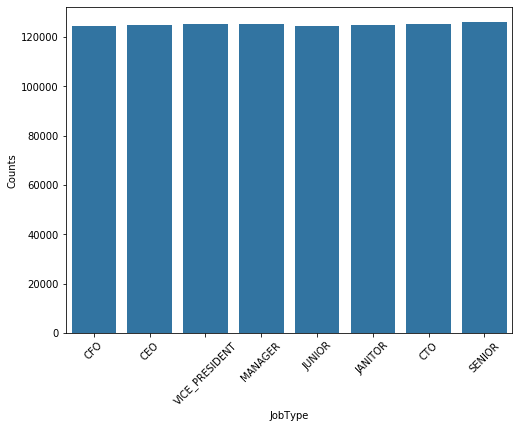

In [73]:
univariate_plots(train_data, 'JobType')

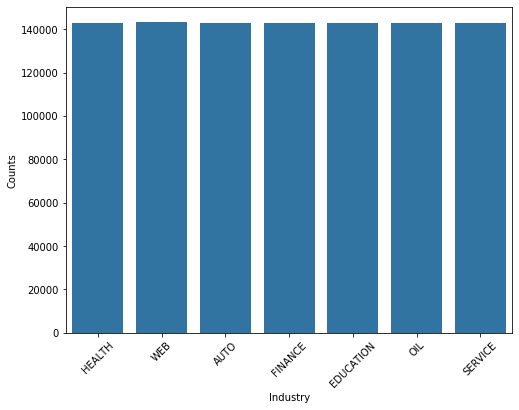

In [74]:
univariate_plots(train_data, 'Industry')

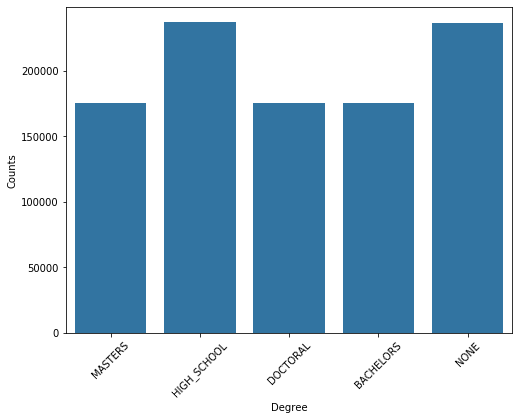

In [78]:
univariate_plots(train_data, 'Degree')

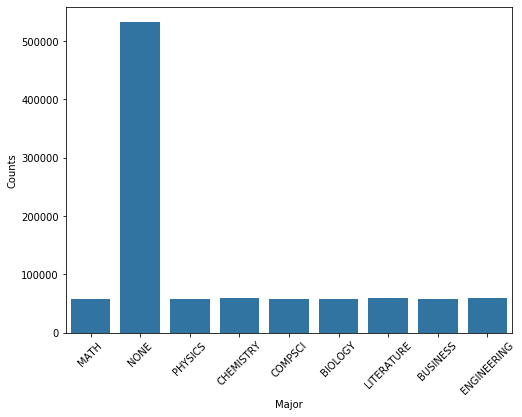

In [76]:
univariate_plots(train_data, 'Major')

### Insights
- Job Type: All job types roughly have a similar count
- Industry: All industries roughly have a similar count
- Degree: Employees with  High school and 'None' degrees have the highest count when compared to other groups. The count of employees with Bachelors, Masters and Doctoral degree are roughly similar.
- Major : Employees with no major are the most popular when compared with other employees. The counts of other majors are roughly the similar

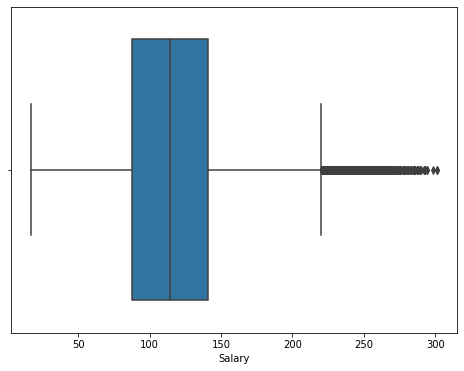

In [50]:
#Visualize the target feature : Salary using boxplot
plt.figure(figsize = (8, 6))
sns.boxplot(train_data.Salary)
plt.show()

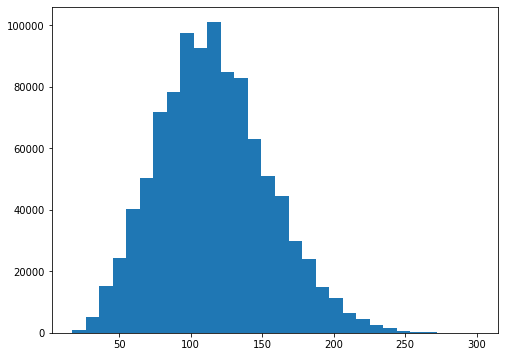

In [83]:
#Visualize the target feature : Salary using histogram
plt.figure(figsize = (8, 6))
plt.hist(data = train_data, x= 'Salary', bins = 30)
plt.show()

- The boxplot indicates the median salary is about 120k and about 75% of employees earn about 85k and more.
- The histogram shows the highest salary point is at about 130k. The histogram is almost a normal distribution except it is slightly right skewed.
- Both plots indicate some outliers which could potentially be salaries of the top management such as the CEOs

In [145]:
#Using IQR to detect and possibly remove outliers from the salary
data = train_data.Salary.describe()
print(data)
IQR = data['75%'] - data['25%']
upper = data['75%'] + 1.5 * IQR
lower = data['25%'] - 1.5 * IQR
print('The upper and lower bounds for the pontential outliers are {} and {}'.format(upper,lower))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: Salary, dtype: float64
The upper and lower bounds for the pontential outliers are 220.5 and 8.5


In [147]:
train_data.loc[train_data.Salary > upper, 'JobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
JANITOR              0
Name: JobType, dtype: int64

This breakdown shows the count of top and middle management roles that earn over 220.5k. It is surprising to have 20 Junior employees in this category. It is worth investigating to discover why these Junior employees earn this much salary.

In [158]:
#Checking for Junior roles outliers

train_data[(train_data.Salary > upper) & (train_data.JobType == 'JUNIOR')]

,JobID,CompanyID,JobType,Degree,Major,Industry,YearsofExperience,MilesFromMetropolis,Salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


As seen above, these Junior employees have long work experience between 18 and 24 years and they work in the high paying industries such as Oil, Finance. 

### Bivariate Exploration

In [ ]:
#define a function to plot the categorical and numeric features

def bivariate_plots(train_data, col):
    plt.figure(figsize = (8,6))
    base_color = sns.color_palette()[0]

    #if column is numeric plot:
    if train_data[col].dtype == 'int64':
        #plt.scatter(data =train_data, x = col, y= 'Salary')
        mean = train_data.groupby(col)['Salary'].mean()
        mean.plot()
    else:
#if column is numeric plot:
        sns.boxplot( x =col, y='Salary', data = train_data, color = base_color)
    
       
#set the labels on the axis
    plt.xticks(rotation =45)
    plt.ylabel('Salaries')
    plt.show()

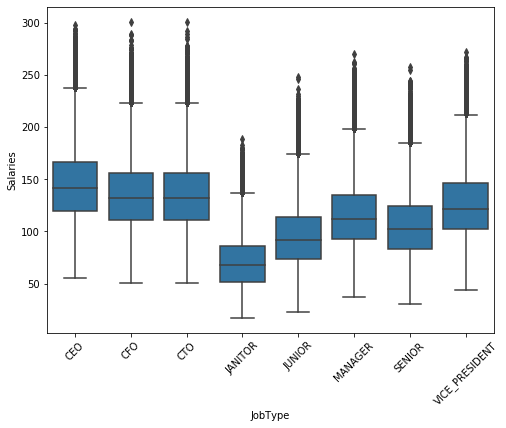

In [66]:
bivariate_plots(train_data, 'JobType')

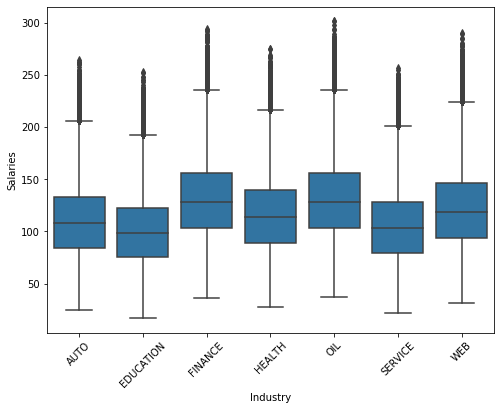

In [67]:
bivariate_plots(train_data, 'Industry')

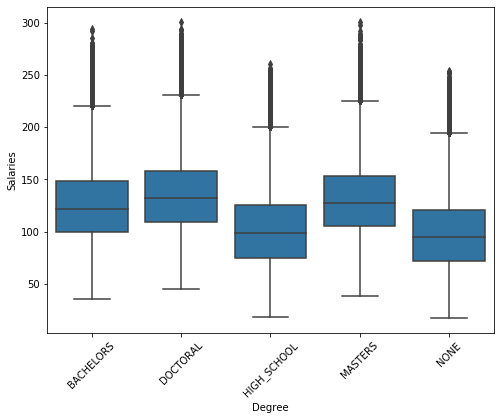

In [68]:
bivariate_plots(train_data, 'Degree')

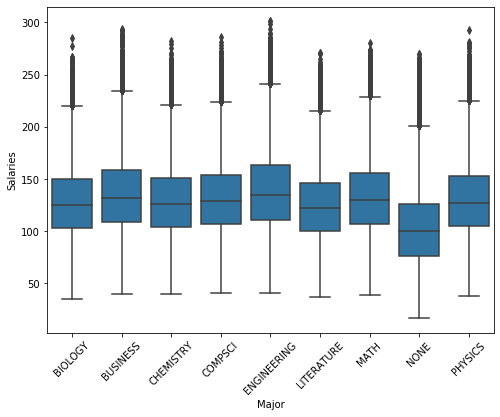

In [69]:
bivariate_plots(train_data, 'Major')

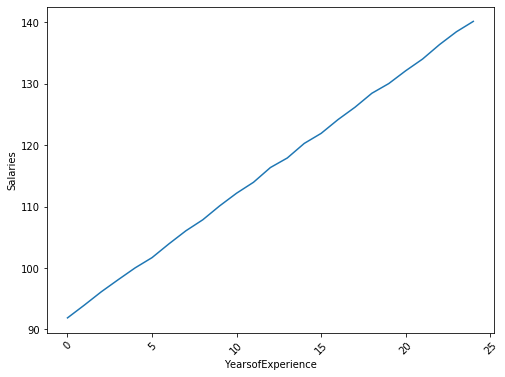

In [85]:
bivariate_plots(train_data,  'YearsofExperience')

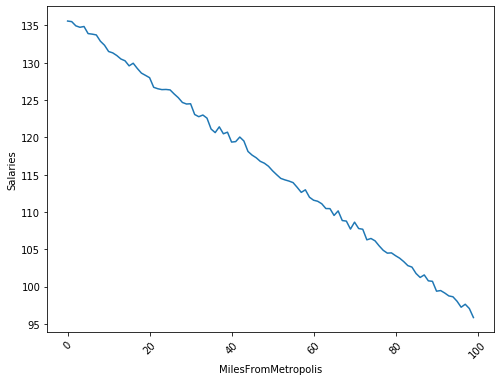

In [84]:
bivariate_plots(train_data, 'MilesFromMetropolis')

### Insights on Bivariate features

- Job Type: The box plot shows the CEO's has the highest salary followed colsely by the salaries of the CFO's, and  CTO's. The Janitor earns the least salary when compared to other employees.
- Industry: The highest earning industries as displayed by the box plot are the Finance and Oil industries while the least two earning industries are the Education and Service sectors. 
- Degree: Employees with high school or no degrees tend to earn lower salaries when compared to other degrees
- Major: The employees who majored in Engineering and Business earn slightly higher than other majors in exception of those with 'none' major. Employees with no major earn the least salaries.
- Years of Experience: The plot shows that as employees years of experience increase, their salaries increases as well and vice-versa.
- Miles from Metropolis: The plot shows thatas  employees miles from metropolis increases, their salaries decreases and vice-versa.  

### Correlation Matrix

In [35]:
#Create duplicate copy of dataset
corr_data = train_data.copy()

In [40]:
def Encode_data(dataset):
    for col in dataset.columns:
        if dataset[col].dtype.name == 'category' or 'object':
            le = LabelEncoder()
            dataset[col]=le.fit_transform(dataset[col])
    return dataset

In [43]:
#confirm encoded data 
DataEncoded = Encode_data(corr_data)
DataEncoded

,JobID,CompanyID,JobType,Degree,Major,Industry,YearsofExperience,MilesFromMetropolis,Salary
0,0,31,1,3,6,3,10,83,114
1,1,11,0,2,7,6,3,73,85
2,2,48,7,1,8,3,10,38,121
3,3,32,5,1,2,0,8,17,126
4,4,60,7,0,8,2,8,16,147
...,...,...,...,...,...,...,...,...,...
999995,999995,52,7,0,2,3,19,94,72
999996,999996,17,2,2,7,2,12,35,144
999997,999997,16,4,2,7,1,16,81,48
999998,999998,23,1,3,7,3,6,5,133


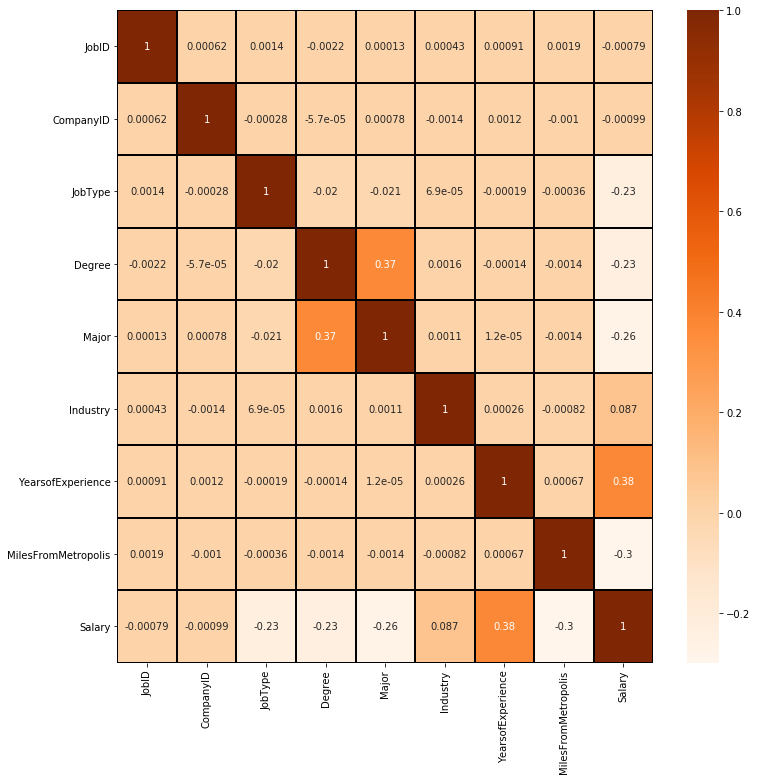

In [59]:
#Check for correlations between variables in dataset

plt.figure(figsize=(12,12))
corr = DataEncoded.corr()
sns.heatmap(corr, xticklabels = True, yticklabels = True, cmap= 'Oranges',
           annot =True, linewidths =1, linecolor ='black')
plt.show()

### Insights

- There is a positive relationship between Salary and Years of Experience. 
- There is a negative relationship between Salary and theses features :Miles from Metropolis, Major and Degree
- Also, there is positive correlation between Major and Degree


### Conclusion

Based on the output of the correlation, there is indication that when years of experience increases, salaries of employees seems to increase, that is employees with longer years of work experience are more likely to earn high salaries

Also, there is an indication that when salary increases, miles from metropolis decreases.This could be that employees who earn high income are more likely to afford homes and other expenses of living in or close to the Metropolis.



